## Problem Statement
Clustering
1. Given a dataset of documents with content from 5 dierent elds ( namely business, entertainment, politics, sport, and tech ), cluster them using any clustering algorithm of your choice.
2. Do not use any libraries for this part. You are expected to code your clustering algorithm from scratch.
3. For feature extraction you can use the vectorizers provided by sklearn or by using the pre trained embeddings. ( Code snippet for the usage of these embeddings has been provided in the previous question ).
4. You might have to perform some pre-processing on the raw documents before you apply your algorithm.
5. We have provided ground truth document tags for the documents. Report accuracy score on these documents.
6. We will test your score on the documents for which the tags have not been provided.
7. In the dataset, the number after the ' ' symbol in the le name denotes the cluster label.
8. The code le must be a python(.py) le. You are expected to dene a class for each question which is compatible with the test.py le provided here.

## Introduction
1. The algorithm for clustering that is implemented - k-means clustering. 
2. For vectorization, we use TFID vectorizer to convert text into a sparse matrix that can be used in the classifier. 
3. We use PorterStemmer from NLTK to stem the words in the paragraphs provided, for better accuracy. 

In [1]:
import q6
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer




## Performance of the algorithm on randomly generated data
We run the algorithm on randomly generated data with 3 Gaussians. 

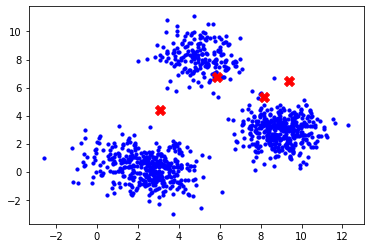

Iteration:  0 Delta:  18.271458918460386
Iteration:  1 Delta:  5.640672160695777
Iteration:  2 Delta:  0.725640410434407
Iteration:  3 Delta:  0.3264831348189906
Iteration:  4 Delta:  0.22330446010502447
Iteration:  5 Delta:  0.14822454166388227
Iteration:  6 Delta:  0.08484943186090213
Iteration:  7 Delta:  0.05053005299195537
Iteration:  8 Delta:  0.018690631367418997
Iteration:  9 Delta:  0.019446215757133335
Iteration:  10 Delta:  0.005549992793753636
Found! Iter =  10


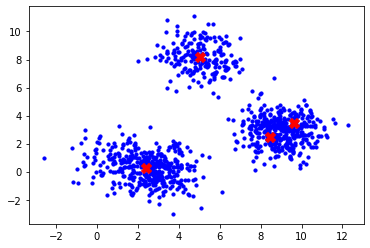

In [2]:
cluster = q6.Cluster()
cluster.data = cluster.generateRandomData()
x = cluster.makeCluster(4, plot = 1)


## Running with the provided data
We use the provided data to run the algorithm and checks its efficacy. To validate, we use this approach: Since we know the actual clustering of the training data, we do clustering based on our algorithm, and then compare our cluster with the given ground truth of the samples included in the cluster: 
1. Run the clustering algorithm to get 5 clusters
2. Pick all the samples included in a given cluster, say X, and check what their real cluster id is
3. Label cluster X as the cluster id shared by majority sample in X
4. In ideal case, 100% of the sample will belong to same ground truth cluster. So our measure of accuracy of clustering is to see what % of samples in cluster X belong to the selected cluster id. 

In our run, while estimates for clusters 2, 3 and 4 are fairly accurate (more than 95%), 1 and 5 are around 50% or less, which suggests more refinement is required. 


In [3]:
cluster = q6.Cluster()
path = "Datasets/Question-6/dataset/"
dlist, colnames = cluster.loadData(path)
dataset = pd.DataFrame(dlist, columns = colnames)

tV, tX, tinputs, tlabels = q6.vectorize(dataset) # Training data

cluster.data = tX.toarray() # convert into dense matrix to make it easier to work with numpy arrays

k_clusters = 5
centroids, cluster_index, euc_distance, iter, clusteringduration = cluster.makeCluster(k_clusters)

clusterlist = list()
for i in range(k_clusters):
        clusterid = i
        clusterdata = dataset[cluster_index == i] # Get the dataframe data. 
        clusterlist.append((clusterid, clusterdata))
q6.verify_clustering(clusterlist)


Iteration:  0 Delta:  2.2433877123670785
Iteration:  1 Delta:  2.0448596445002405
Iteration:  2 Delta:  0.2139240016772232
Iteration:  3 Delta:  0.14185720091854437
Iteration:  4 Delta:  0.11545561936073262
Iteration:  5 Delta:  0.10020373477304405
Iteration:  6 Delta:  0.04751723052268593
Iteration:  7 Delta:  0.027932018751826958
Iteration:  8 Delta:  0.02015434749651488
Iteration:  9 Delta:  0.012332743652552654
Iteration:  10 Delta:  0.007081968521705381
Iteration:  11 Delta:  0.0024135074960791136
Found! Iter =  11

Clustered group    0
Cluster ID:  5  Accuracy % (% of samples belonging to dominant true cluster):  51.43

Clustered group    1
Cluster ID:  1  Accuracy % (% of samples belonging to dominant true cluster):  46.47

Clustered group    2
Cluster ID:  2  Accuracy % (% of samples belonging to dominant true cluster):  93.98

Clustered group    3
Cluster ID:  4  Accuracy % (% of samples belonging to dominant true cluster):  96.63

Clustered group    4
Cluster ID:  3  Accuracy